# Grupo 6 - Ana Beatriz, Camila, Julia, Rodrigo

Base de Dados **Stock Market Data (NASDAQ, NYSE, S&P500)**

Context
Daily stock market prices.

Content
Date, Volume, High, Low, and Closing Price (for all NASDAQ, S&P500, and NYSE listed companies). Updated weekly.

**Fontes: https://www.kaggle.com/paultimothymooney/stock-market-data**

**Biblioteca Yahoo Finance (yfinance). API para baixar direto do Yahoo Finance dados de ações**

# Nasdaq


<img src="Nasdaq_4.jpg" width="200"/>


**NASDAQ Stock Market ou simplesmente NASDAQ é um mercado de ações automatizado norte-americano** onde estão listadas mais de 2 800 ações de diferentes empresas, em sua maioria de pequena e média capitalização. 

É o segundo maior mercado de ações em capitalização de mercado do mundo, depois da Bolsa de Nova York.

O NASDAQ caracteriza-se por reunir **empresas de alta tecnologia em eletrônica, informática, telecomunicações, biotecnologia, e outras áreas similares e afins.**

Amostra de Empresas:

- Apple
- Amazon
- AMD
- Facebook
- Microsoft


Fonte: Wikipedia

# NYSE

A New York Stock Exchange , cuja abreviação oficial é NYSE, **é a bolsa de valores de Nova Iorque**. Está localizada em Manhattan, na Wall Street.

**É de longe a maior bolsa de valores em valor de mercado** das empresas listadas, USD 30.1 trilhões em Fevereiro de 2018. O Valor negociado diáriamente era aproximadamente USD 169 bilhões em 2013.

Amostra de Empresas:

- ALIBABA GROUP HOLDING
- BERKSHIRE HATHAWAY
- J P MORGAN CHASE & CO
- VISA
- JOHNSON & JOHNSON
- WALMART
- BANK OF AMERICA CORPORATION
- PROCTER & GAMBLE COMPANY


Fonte: Wikipedia

# S&P500

S&P 500, abreviação de Standard & Poor's 500, ou simplesmente S&P, **trata-se de um índice composto por quinhentos ativos (ações) cotados nas bolsas de NYSE ou NASDAQ, qualificados devido ao seu tamanho de mercado, sua liquidez e sua representação de grupo industrial.**

É um índice ponderado de valor de mercado (valor do ativo multiplicado pelo número de ações em circulação) com o peso de cada ativo no índice proporcional ao seu preço de mercado. S&P faz referência a Standard & Poor's, uma empresa de consultoria financeira.

Fonte: Wikipedia

In [2]:
# precisar rodar os comandos pip abaixo no terminal para instalar as bibliotecas do yahoo finance
# ou descomentar as duas linhas e rodar o script
# pip install yfinance
# pip install yahoofinancials
# pip install scipy
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from numpy.random import seed
from scipy.stats import pearsonr
import os
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import scipy


# Data inicial e final da análise
startdate = '2001-01-01'
enddate = '2021-10-31'
#enddate = '2004-12-31'

# Exploração básica de dados. Usando ação da Apple como exemplo

In [3]:
df_aapl_orig = yf.download('AAPL', 
                      start=startdate, 
                      end=enddate, 
                      progress=False)
df_aapl_orig

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,0.227738,452312000
2001-01-03,0.258929,0.297991,0.257813,0.292411,0.250703,817073600
2001-01-04,0.323940,0.330357,0.300223,0.304688,0.261229,739396000
2001-01-05,0.302455,0.310268,0.286830,0.292411,0.250703,412356000
2001-01-08,0.302455,0.303292,0.284598,0.295759,0.253573,373699200
...,...,...,...,...,...,...
2021-10-25,148.679993,149.369995,147.619995,148.639999,148.423386,50720600
2021-10-26,149.330002,150.839996,149.009995,149.320007,149.102402,60893400
2021-10-27,149.360001,149.729996,148.490005,148.850006,148.633087,56094900


In [3]:
df_aapl_orig.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5241 entries, 2001-01-02 to 2021-10-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5241 non-null   float64
 1   High       5241 non-null   float64
 2   Low        5241 non-null   float64
 3   Close      5241 non-null   float64
 4   Adj Close  5241 non-null   float64
 5   Volume     5241 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 286.6 KB


In [4]:
df_aapl_orig.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5.241000e+03
mean,24.267542,24.521145,24.010284,24.275849,23.135889,4.295649e+08
std,32.863680,33.221241,32.500744,32.877690,32.758620,3.815701e+08
min,0.231964,0.235536,0.227143,0.234286,0.200869,3.934000e+07
25%,2.369286,2.396786,2.314286,2.363214,2.026136,1.557124e+08
50%,12.522857,12.641071,12.415714,12.525000,10.738500,3.119312e+08
75%,30.690001,30.962500,30.427500,30.642500,28.234013,5.779704e+08
max,156.979996,157.259995,154.389999,156.690002,156.461655,3.372970e+09


**O gráfico candlestick é uma forma de condensar todas essas informações básicas de uma ação**

C:\Anaconda\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


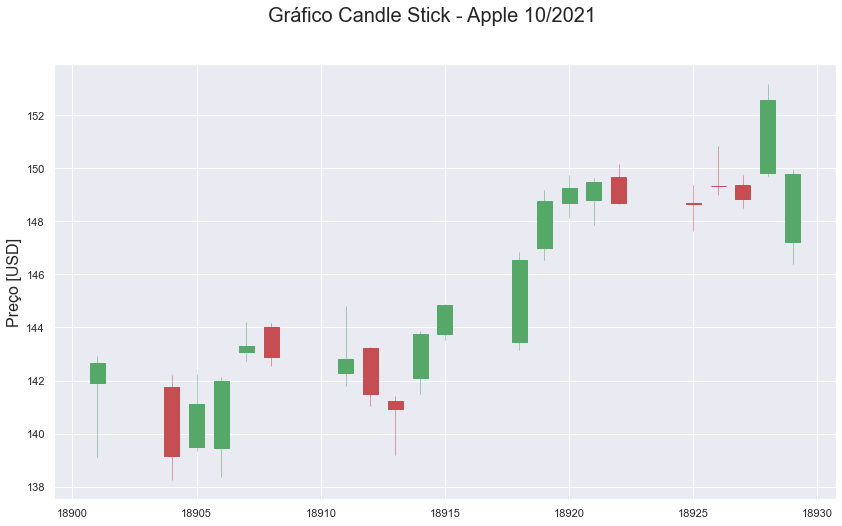

In [5]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
sns.set_theme(style="darkgrid")
df_aapl_reset=df_aapl_orig.loc['2021-10'].reset_index();
df_aapl_reset['date_ax']=df_aapl_reset['Date'].apply(lambda date: date2num(date));
aapl_values=[tuple(vals) for vals in df_aapl_reset[['date_ax','Open','High','Low','Close']].values];
df_aapl_reset;


fig,ax=plt.subplots(figsize=(14,8));
candlestick_ohlc(ax,aapl_values,width=0.6,colorup='g',colordown='r');
fig.suptitle('Gráfico Candle Stick - Apple 10/2021', fontsize=20);
ax.set_ylabel('Preço [USD]',fontsize=16);

**Gráfico para verificar a evolução do preço e do volume negociado nos últimos 20 anos**

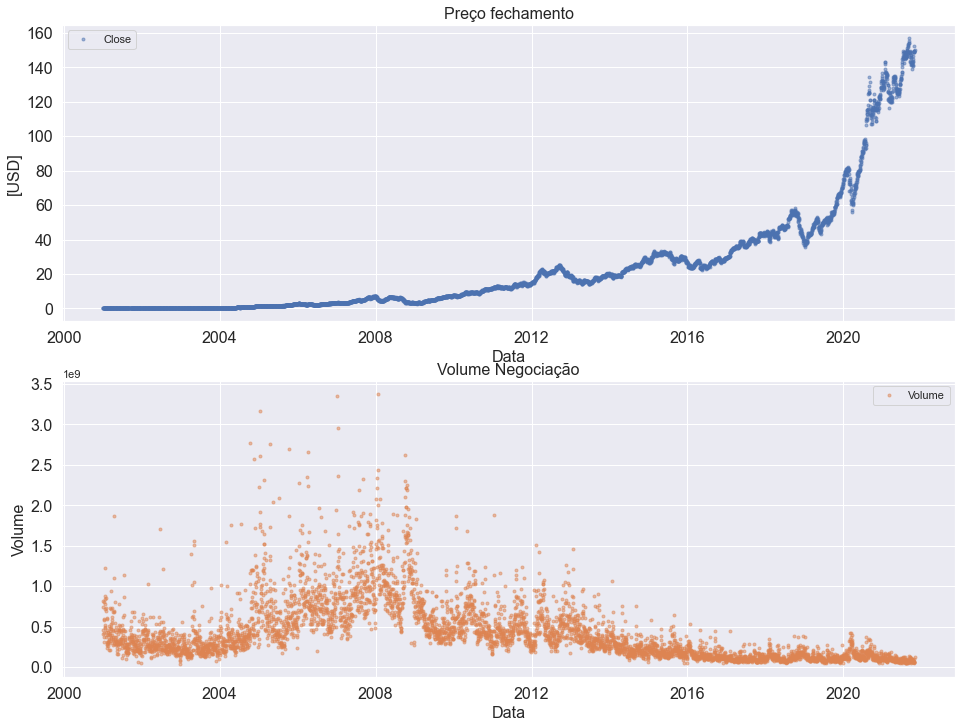

In [6]:
import matplotlib.dates as mdates

cols_plot=['Close','Volume']
axes = df_aapl_orig[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 12), subplots=True,sharex=False,grid =True);

axes[0].set_title("Preço fechamento",fontsize=16);
axes[1].set_title("Volume Negociação",fontsize=16);


axes[0].set_ylabel('[USD]',fontsize=16);
axes[1].set_ylabel('Volume',fontsize=16);

axes[0].set_xlabel('Data',fontsize=16);
axes[1].set_xlabel('Data',fontsize=16);

axes[0].tick_params(axis='both', which='major', labelsize=16);
axes[1].tick_params(axis='both', which='major', labelsize=16);

Observar que o valor da ação subiu bastante a partir de 2012. Interessante que o volume negociado caiu indicando que valorização fez a liquidez de uma ação cair.

# Explorando sazonalidade no preço e volume negociado

Verificar se há alguma variação no preço e volume negociado ao longo dos meses do ano e ao longo dos dias da semana

In [7]:
df_aapl_orig['Mes']=df_aapl_orig.index.month
df_aapl_orig['Weekday']=df_aapl_orig.index.day_name()

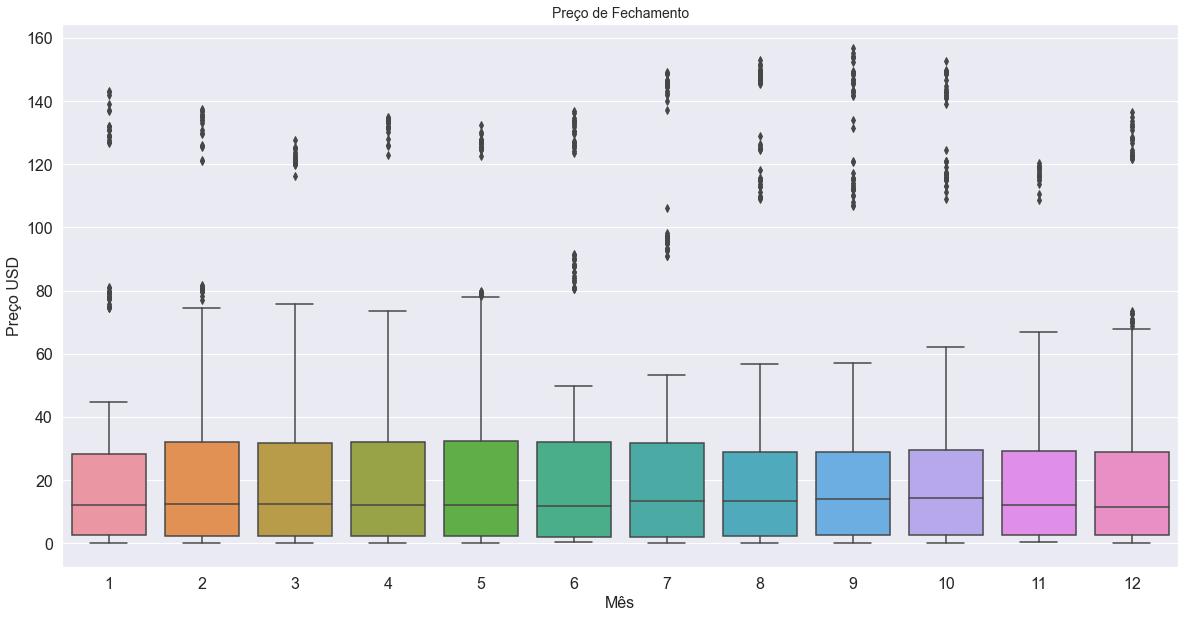

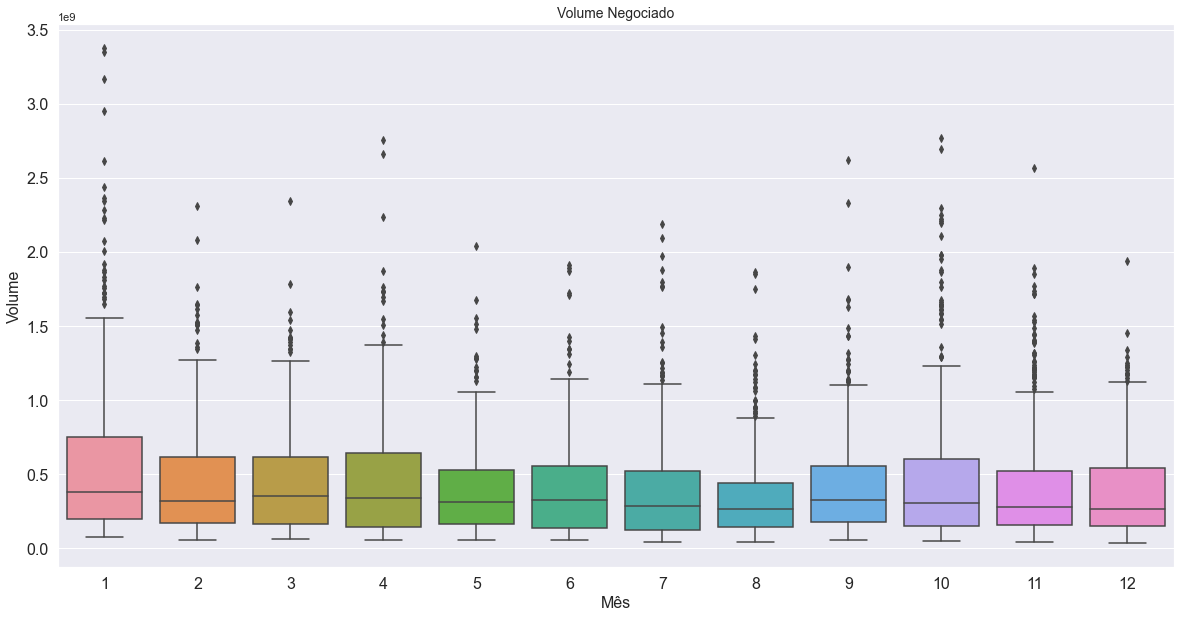

In [8]:
fig, axes = plt.subplots(1,1, figsize=(20, 10))

sns.boxplot(data=df_aapl_orig, x='Mes', y='Close', ax=axes);
axes.set_ylabel('Preço USD',fontsize=16);
axes.set_xlabel('Mês',fontsize=16);
axes.set_title('Preço de Fechamento',fontsize=14);
axes.tick_params(axis='both', which='major', labelsize=16);

fig, axes = plt.subplots(1,1, figsize=(20, 10))

sns.boxplot(data=df_aapl_orig, x='Mes', y='Volume', ax=axes);
axes.set_ylabel('Volume',fontsize=16);
axes.set_xlabel('Mês',fontsize=16);
axes.set_title('Volume Negociado',fontsize=14);
axes.tick_params(axis='both', which='major', labelsize=16);

**O efeito sazonal mais claro é uma redução no volume negociado no mês de Agosto.** Provavelmente decorrente do inicio do verão e período no hemisferio norte.

# Gráfico de volume considerando média móvel de 30 dias

Verificar o efeito sazonal no volume

In [9]:
df_aapl_media_movel = df_aapl_orig[['Volume']].rolling(window=30, center=True, min_periods=30).mean()
df_aapl_media_movel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5241 entries, 2001-01-02 to 2021-10-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Volume  5212 non-null   float64
dtypes: float64(1)
memory usage: 81.9 KB


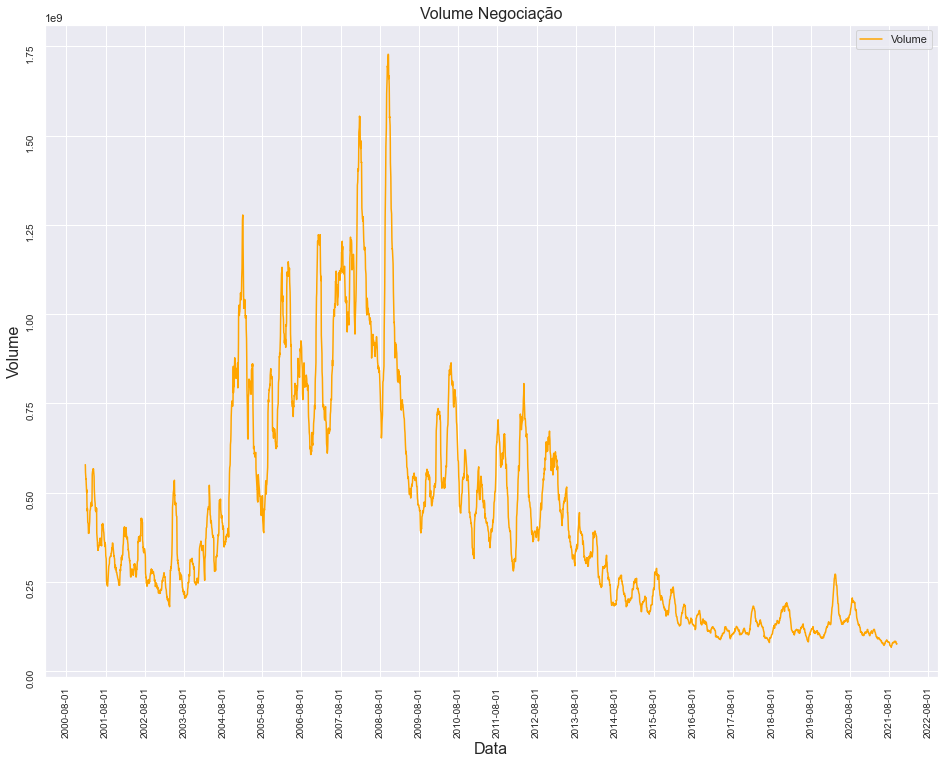

In [10]:
import matplotlib.dates as mdates

cols_plot=['Volume']
axes = df_aapl_media_movel[cols_plot].plot(alpha=1, color='orange', linestyle='-', figsize=(16, 12), subplots=True,sharex=False);

axes[0].xaxis.set_major_locator(mdates.YearLocator(1,8,1))



axes[0].set_title("Volume Negociação",fontsize=16);


axes[0].set_ylabel('Volume',fontsize=16);


axes[0].set_xlabel('Data',fontsize=16);

axes[0].tick_params(axis='both', which='major', labelsize=10,rotation=90);



**Em geral próximo ao mês de agosto ocorre um mínimo local no volume operado**

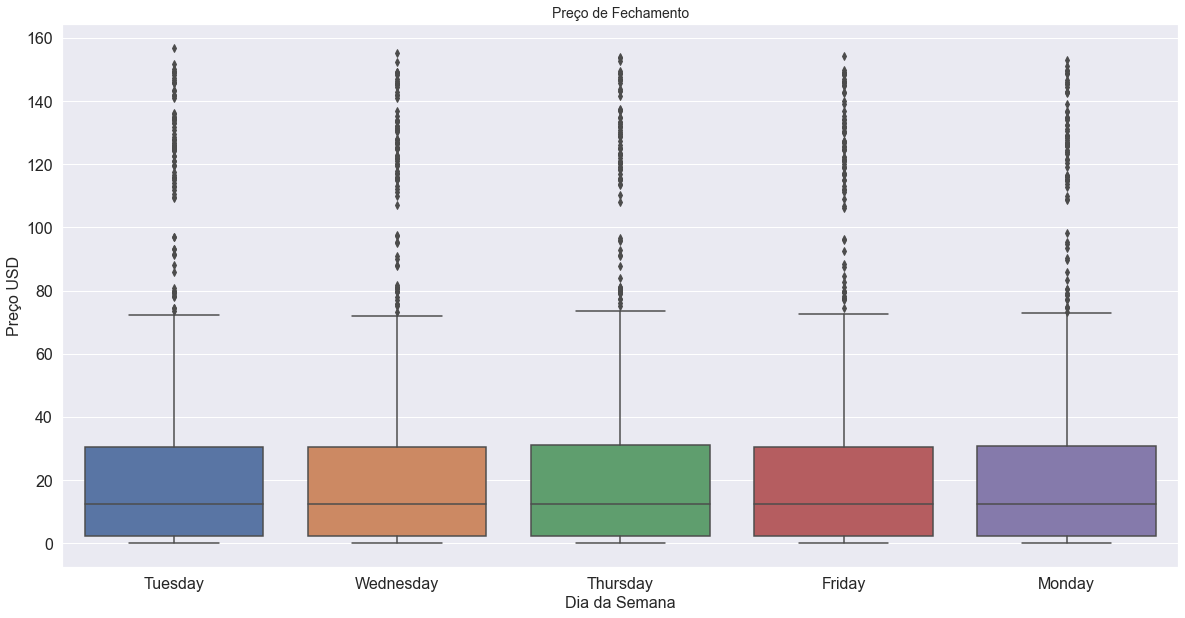

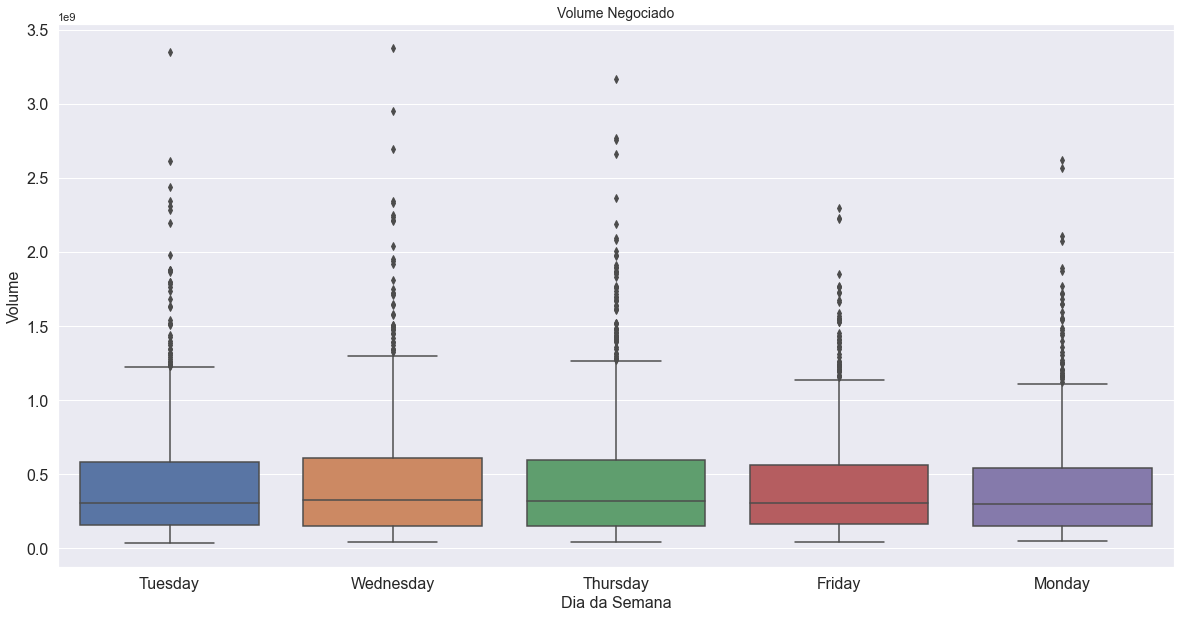

In [11]:
fig, axes = plt.subplots(1,1, figsize=(20, 10))

sns.boxplot(data=df_aapl_orig, x='Weekday', y='Close', ax=axes);
axes.set_ylabel('Preço USD',fontsize=16);
axes.set_xlabel('Dia da Semana',fontsize=16);
axes.set_title('Preço de Fechamento',fontsize=14);
axes.tick_params(axis='both', which='major', labelsize=16);

fig, axes = plt.subplots(1,1, figsize=(20, 10))

sns.boxplot(data=df_aapl_orig, x='Weekday', y='Volume', ax=axes);
axes.set_ylabel('Volume',fontsize=16);
axes.set_xlabel('Dia da Semana',fontsize=16);
axes.set_title('Volume Negociado',fontsize=14);
axes.tick_params(axis='both', which='major', labelsize=16);

**Ocorre um aumento na negociação das ações da Apple nas Quartas e Quintas.** O volume é um pouco menos nas segundas e sextas

# Retorno e Risco

**O preço de uma ação não permite comparar o desempenho de diferentes ações ao longo do tempo diretamente.**

Do ponto de vista do investidor os dois dados básicos para analise de ações são **retorno e risco**

# Retorno - Stock Price Return

**É uma forma de "normalizar" o preço das ações**

Cálculo do retorno de uma ação.
Simplificação não considera o pagamento de dividendos.

<img src="Stock_Price_Return.png" width="400"/>

Cálculo de retorno acumulado em mais de um período

<img src="Multi_period_return.png" width="400"/>

# Calculando o Retorno para 2 Ações:Apple e  Microsoft
# Periódo 2001- 10/2021

In [12]:
# Versão mais completa para AAPL
# Puxando os dados do Yahoo Finance com os mesmos valores
df_aapl = yf.download('AAPL', 
                      start=startdate, 
                      end=enddate, 
                      progress=False).pct_change()+1 # pct_change calcula as variações
                                                     # percentuais diárias dos preços e adicionamos 1
                                                     # para termos o fator de variação 

# Selecionando apenas a coluna do preço de fechamento ajustado 
df_aapl = df_aapl[['Adj Close']]

# Criando coluna com a performance acumulada dos ativos
df_aapl['AAPL_acum'] = df_aapl.cumprod()

# Trocando o nome da coluna do que veio da base para o identificador
df_aapl = df_aapl.rename(columns={"Adj Close": "AAPL"})

df_aapl

,AAPL,AAPL_acum
Date,,
2001-01-02,NaN,NaN
2001-01-03,1.100841,1.100841
2001-01-04,1.041986,1.147061
2001-01-05,0.959706,1.100841
2001-01-08,1.011450,1.113445
...,...,...
2021-10-25,0.999664,651.729679
2021-10-26,1.004575,654.711250
2021-10-27,0.996852,652.650482


In [13]:
# Versão mais concisa para MSFT
df_msft = yf.download('MSFT', 
                      start=startdate, 
                      end=enddate, 
                      progress=False).pct_change()+1

df_msft = df_msft[['Adj Close']]

df_msft['MSFT_acum'] = df_msft.cumprod()

df_msft = df_msft.rename(columns={"Adj Close": "MSFT"})

df_msft

,MSFT,MSFT_acum
Date,,
2001-01-02,NaN,NaN
2001-01-03,1.105187,1.105187
2001-01-04,1.010430,1.116715
2001-01-05,1.014194,1.132565
2001-01-08,0.996183,1.128242
...,...,...
2021-10-25,0.996668,22.463637
2021-10-26,1.006426,22.607982
2021-10-27,1.042114,23.560100


In [14]:
# Unindo os 2 dataframes pelo indexador
df = pd.merge(df_aapl, df_msft, left_index=True, right_index=True)
df

,AAPL,AAPL_acum,MSFT,MSFT_acum
Date,,,,
2001-01-02,NaN,NaN,NaN,NaN
2001-01-03,1.100841,1.100841,1.105187,1.105187
2001-01-04,1.041986,1.147061,1.010430,1.116715
2001-01-05,0.959706,1.100841,1.014194,1.132565
2001-01-08,1.011450,1.113445,0.996183,1.128242
...,...,...,...,...
2021-10-25,0.999664,651.729679,0.996668,22.463637
2021-10-26,1.004575,654.711250,1.006426,22.607982
2021-10-27,0.996852,652.650482,1.042114,23.560100


In [15]:
# Criando coluna auxiliar que discrimina por mês e ano. Deve ajudar para a ideia de testar ideia de investimentos mensais
df['month_year'] = df.index.strftime('%m/%Y')
df

,AAPL,AAPL_acum,MSFT,MSFT_acum,month_year
Date,,,,,
2001-01-02,NaN,NaN,NaN,NaN,01/2001
2001-01-03,1.100841,1.100841,1.105187,1.105187,01/2001
2001-01-04,1.041986,1.147061,1.010430,1.116715,01/2001
2001-01-05,0.959706,1.100841,1.014194,1.132565,01/2001
2001-01-08,1.011450,1.113445,0.996183,1.128242,01/2001
...,...,...,...,...,...
2021-10-25,0.999664,651.729679,0.996668,22.463637,10/2021
2021-10-26,1.004575,654.711250,1.006426,22.607982,10/2021
2021-10-27,0.996852,652.650482,1.042114,23.560100,10/2021


In [16]:
# Formatando a data de referência no índice
df.index = df.index.strftime('%d/%m/%Y')
df

,AAPL,AAPL_acum,MSFT,MSFT_acum,month_year
Date,,,,,
02/01/2001,NaN,NaN,NaN,NaN,01/2001
03/01/2001,1.100841,1.100841,1.105187,1.105187,01/2001
04/01/2001,1.041986,1.147061,1.010430,1.116715,01/2001
05/01/2001,0.959706,1.100841,1.014194,1.132565,01/2001
08/01/2001,1.011450,1.113445,0.996183,1.128242,01/2001
...,...,...,...,...,...
25/10/2021,0.999664,651.729679,0.996668,22.463637,10/2021
26/10/2021,1.004575,654.711250,1.006426,22.607982,10/2021
27/10/2021,0.996852,652.650482,1.042114,23.560100,10/2021


In [17]:
# Calculando a performance mês a mês
df_perf_mes = df[['AAPL','MSFT','month_year']].groupby('month_year').prod()-1
df_perf_mes


,AAPL,MSFT
month_year,,
01/2001,0.453782,0.407781
01/2002,0.128770,-0.038339
01/2003,0.002095,-0.082011
01/2004,0.055686,0.010230
01/2005,0.194099,-0.016467
...,...,...
12/2016,0.047955,0.031198
12/2017,-0.015246,0.016276
12/2018,-0.116698,-0.084047


In [18]:
# Se quiser a linha com a maior performance diária
row_max = df_aapl[df_aapl.AAPL == df_aapl.AAPL.max()]-1
row_max

,AAPL,AAPL_acum
Date,,
2008-10-13,0.139049,13.82487


In [19]:
# Se quiser a linha com a menor performance diária
row_min = df_aapl[df_aapl.AAPL == df_aapl.AAPL.min()]-1
row_min

,AAPL,AAPL_acum
Date,,
2008-09-29,-0.179195,13.152601


In [20]:
# Se quiser a maior variação pasitiva e um ativo
max_aapl = df_aapl["AAPL"].max() -1
max_aapl

0.13904908622165113

In [21]:
# Se quiser a queda diária de um ativo
min_aapl = df_aapl["AAPL"].min() -1
min_aapl

-0.17919544313263136

In [22]:
# Calculando a correlação dos retornos diários utilizando as colunas com fatores de retornos diários pelo método de Pearson
# Retirando as linhas com valores nulos para que realizar o cálculo
df = df.dropna()

# Utilizando a função do scipy.stats que retorna o fator de correlação e o p-valor
corr_pearson, p_value = pearsonr(df["AAPL_acum"],df["MSFT_acum"])

In [23]:
corr_pearson

0.9824092027210448

**P Valor infinitesimalmente pequeno.** logo, a correlação tem uma alta significância estatística

In [24]:
p_value

0.0

# Correlação de Pearson

**Coeficiente de correlação forte, entre 0.70 e 0,89**

Obs.: as duas ações são de empresas americanas de tecnologia, praticamente do mesmo tamanho e que vendem produtos simulares 

Mkt Cap AAPL: USD 2.46tri; Mkt Cap MSFT: USD 2.53tri o que justifica uma correlação forte

Um estudo interessante seria testar a correlação de 2 empresas de setores distintos e com tamanhos bem diferentes

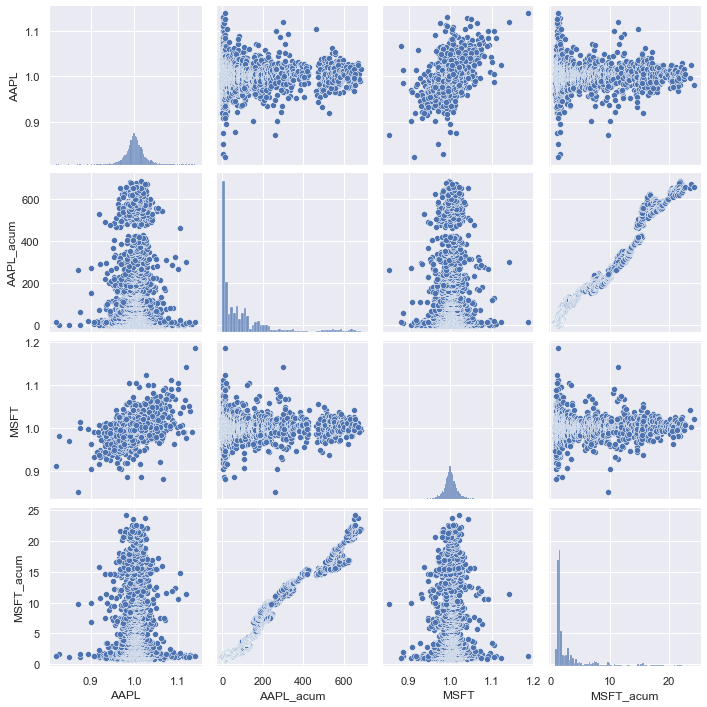

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()

In [26]:
def cria_tabela_1_acao(Ticker,startdate,enddate):
    'Funçao que le o ticker e faz o download no periodo desejado'
    # Puxando os dados do Yahoo Finance com os mesmos valores
    df_acao = yf.download(Ticker, 
                          start=startdate, 
                          end=enddate, 
                          progress=False)
                                                        
                                                        
    
    # Selecionando colunas de interessePreço Ajustado
    df_acao = df_acao[['Adj Close']]
    df_acao.loc[:,'Adj Close']=df_acao['Adj Close'].pct_change()
    df_acao['Adj_Close_plus1']=df_acao['Adj Close']+1
    
    # Criando coluna com a performance acumulada dos ativos
    df_acao['Acum'] = df_acao.Adj_Close_plus1.cumprod()
    # Trocando nome da Coluna
    df_acao = df_acao.rename(columns={"Adj Close": "Close"})
    
    return df_acao

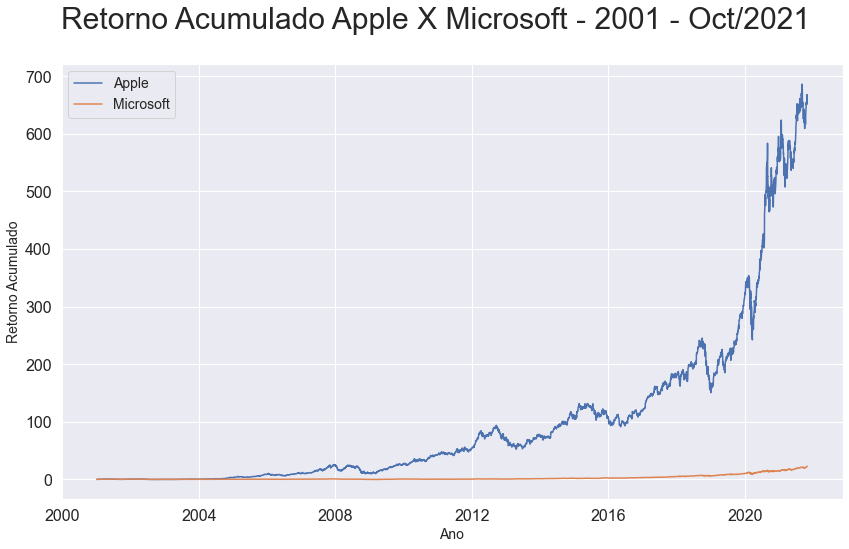

In [27]:
df_aapl=cria_tabela_1_acao('AAPL',startdate,enddate)
df_msft=cria_tabela_1_acao('MSFT',startdate,enddate)
# Plotando alguns gráficos
fig, axs = plt.subplots(1, 1, figsize=(14,8))
fig.suptitle('Retorno Acumulado Apple X Microsoft - 2001 - Oct/2021 ', fontsize=30)

 

axs.plot(df_aapl.index,df_aapl.Acum-1,label='Apple')
axs.plot(df_msft.index,df_msft.Acum-1,label='Microsoft')

axs.set_xlabel('Ano',fontsize=14)
axs.set_ylabel('Retorno Acumulado',fontsize=14)
axs.legend(fontsize=14)
axs.tick_params(axis='both', which='major', labelsize=16)

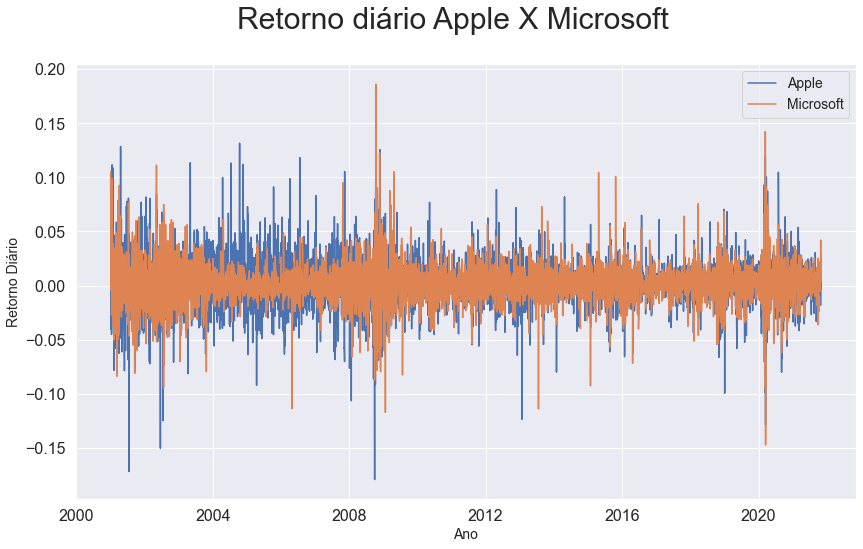

In [28]:
# Plotando alguns gráficos
fig, axs = plt.subplots(1, 1, figsize=(14,8))
fig.suptitle('Retorno diário Apple X Microsoft', fontsize=30)

 
axs.plot(df_aapl.index,df_aapl.Close,label='Apple')
axs.plot(df_msft.index,df_msft.Close,label='Microsoft')

axs.set_xlabel('Ano',fontsize=14)
axs.set_ylabel('Retorno Diário',fontsize=14)
axs.legend(fontsize=14)
axs.tick_params(axis='both', which='major', labelsize=16)

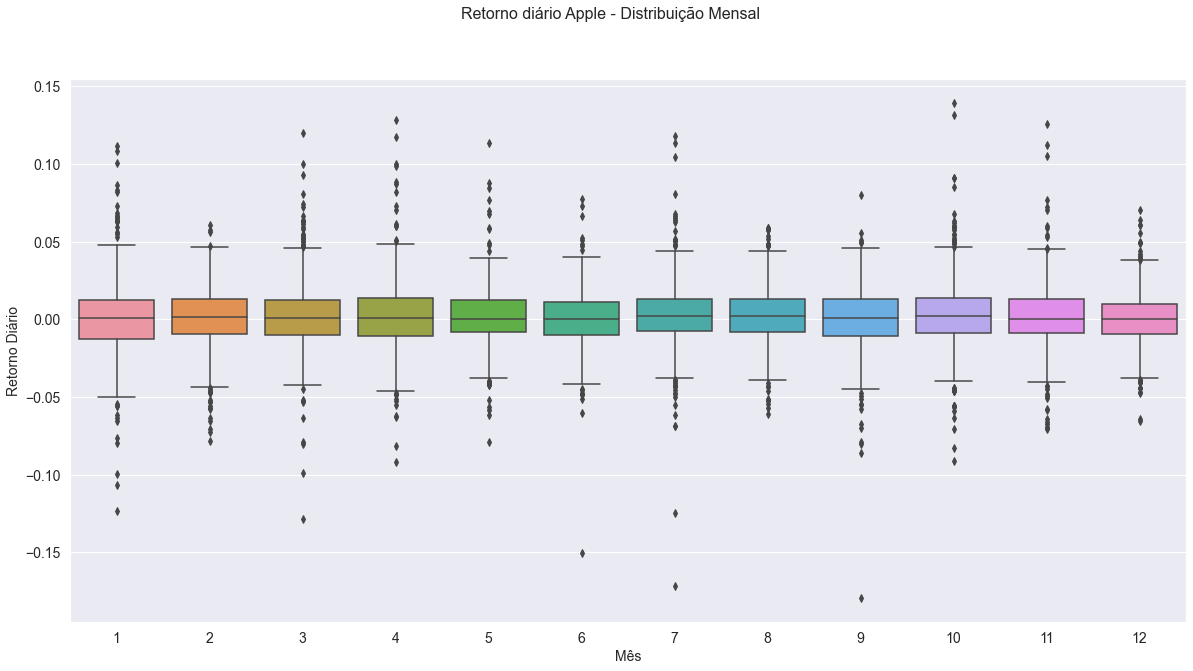

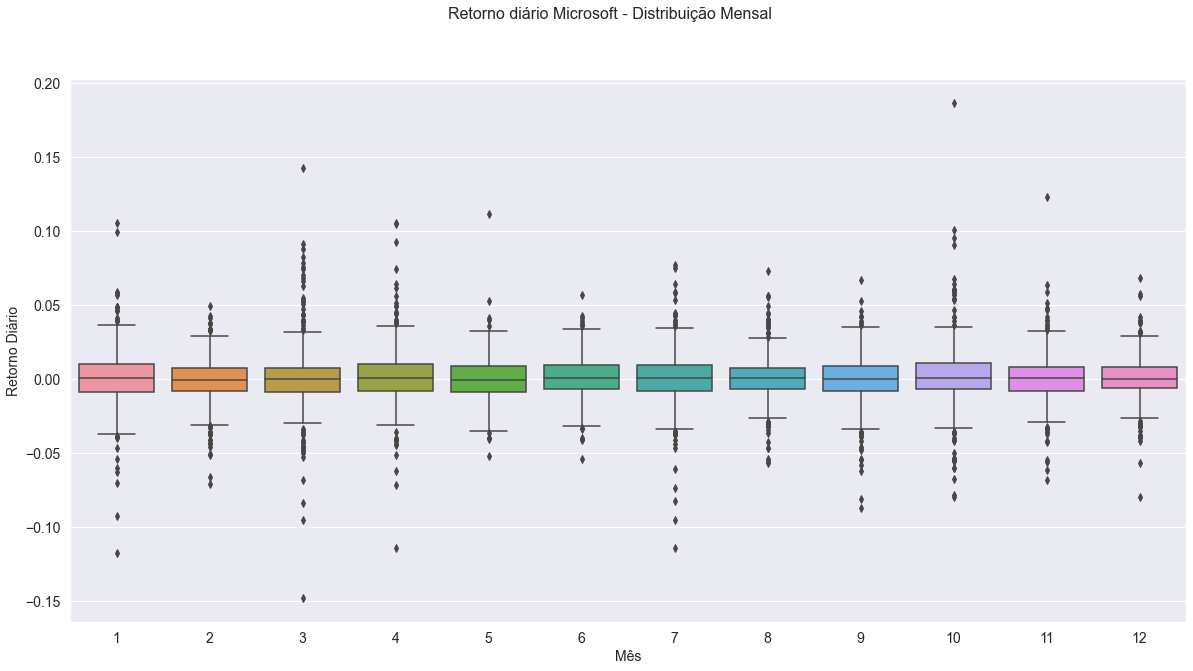

In [29]:
df_aapl['Mes']=df_aapl.index.month
df_msft['Mes']=df_msft.index.month

fig, axes = plt.subplots(1,1, figsize=(20, 10), sharex=True)

for name in ['Close']:
    sns.boxplot(data=df_aapl, x='Mes', y=name, ax=axes)

    
fig.suptitle('Retorno diário Apple - Distribuição Mensal', fontsize=16)
axes.set_xlabel('Mês',fontsize=14)
axes.set_ylabel('Retorno Diário',fontsize=14)
axes.tick_params(axis='both', which='major', labelsize=14)

fig, axes = plt.subplots(1,1, figsize=(20, 10), sharex=True) 
for name in ['Close']:
    sns.boxplot(data=df_msft, x='Mes', y=name, ax=axes)


fig.suptitle('Retorno diário Microsoft - Distribuição Mensal', fontsize=16)
axes.set_xlabel('Mês',fontsize=14)
axes.set_ylabel('Retorno Diário',fontsize=14)
axes.tick_params(axis='both', which='major', labelsize=14)

# Retorno 50 ações mais negociadas da Nasdaq em Volume de USD

In [30]:
Nasdaq=['AAPL', 'AMZN', 'MSFT', 
  'FB', 'NVDA', 'AMD', 'NFLX', 
  'V', 'INTC', 'MA', 'MU', 'ADBE', 
  'BIDU', 'QCOM', 'CSCO', 'CMCSA', 
  'COST', 'AAL', 'JD', 'AMAT', 'GILD',
  'PLUG', 'SBUX', 'LRCX', 'TXN', 'NVAX',
  'CHTR', 'AMGN', 'MELI', 'ATVI', 'REGN',
  'NCLH', 'FISV', 'INTU', 'EBAY', 'LULU', 
  'BIIB', 'ISRG', 'NXPI', 'ADI', 'VRTX', 
  'ASML', 'GOLD', 'ENPH', 'MDLZ', 'ILMN', 
  'PENN', 'WYNN', 'DXCM', 'EQIX']

Frames=[]
for acao in Nasdaq:
    provisorio=cria_tabela_1_acao(acao,startdate,enddate)
    provisorio['Market']='nasdaq'
    provisorio['Ticker']=acao
    provisorio['month_year'] = provisorio.index.strftime('%m/%Y')
    provisorio['year'] = provisorio.index.strftime('%Y')
    provisorio.reset_index(inplace=True)
    Frames.append(provisorio)
    
    
df2 = pd.concat(Frames,ignore_index=False)
df2.set_index('Date',inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 234488 entries, 2001-01-02 to 2021-10-29
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Close            234438 non-null  float64
 1   Adj_Close_plus1  234438 non-null  float64
 2   Acum             234438 non-null  float64
 3   Market           234488 non-null  object 
 4   Ticker           234488 non-null  object 
 5   month_year       234488 non-null  object 
 6   year             234488 non-null  object 
dtypes: float64(3), object(4)
memory usage: 10.7+ MB


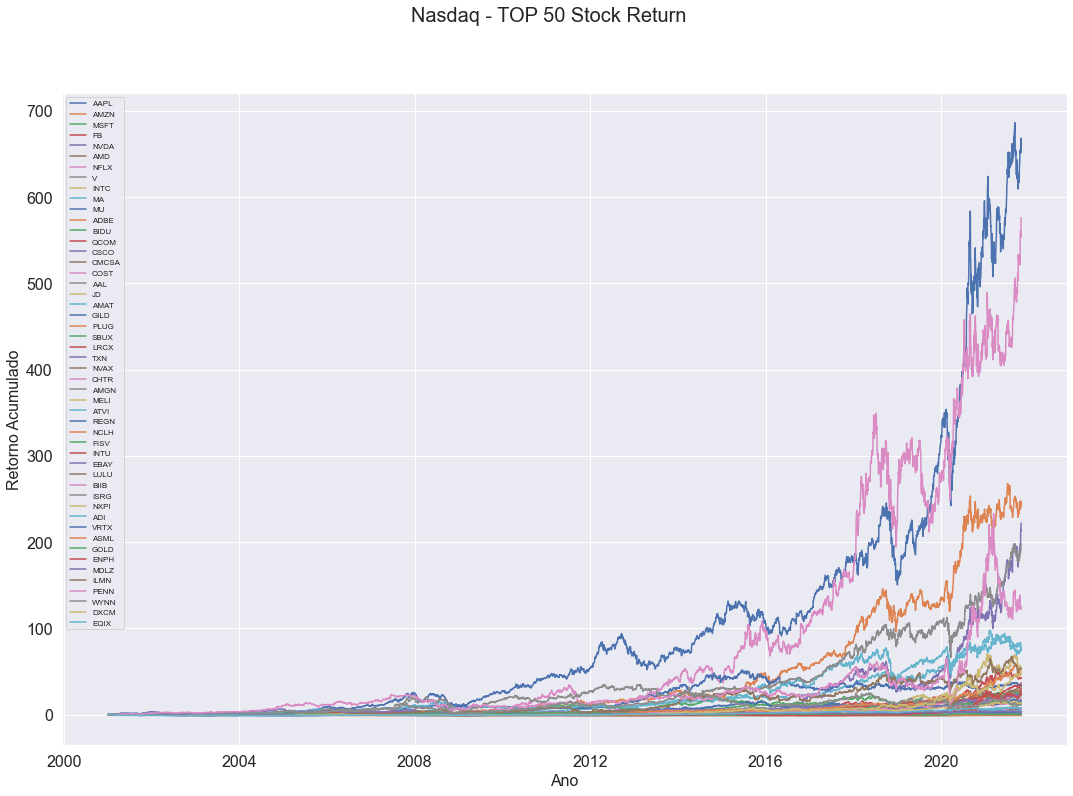

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(18,12))
fig.suptitle('Nasdaq - TOP 50 Stock Return', fontsize=20);

 
for i in df2['Ticker'].unique():
    axs.plot(df2[df2.loc[:,'Ticker']==i].index,df2[df2.loc[:,'Ticker']==i]['Acum']-1,label=i)

axs.set_xlabel('Ano',fontsize=16)
axs.set_ylabel('Retorno Acumulado',fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)
axs.legend(fontsize=8);

In [32]:
ranking_2001_2021=df2.pivot(columns='Ticker',values='Acum').tail(1).T.round(2)-1
ranking_2001_2021.sort_values('2021-10-29',ascending=False)

Date,2021-10-29
Ticker,
AAPL,655.82
NFLX,575.98
AMZN,242.06
NVDA,222.10
ISRG,198.24
PENN,121.84
MA,77.41
ATVI,74.15
ASML,53.70


# Risco

Um indice de risco é a volatilidade. Uma forma de medir a volatilidade de uma ação é calculando a variância/ desvio padrão dos retornos


<img src="desvio-padrao.jpg" width="200"/>

In [33]:
Risco=pd.DataFrame([["AAPL", df_aapl.Close.std()],["MSFT", df_msft.Close.std()]])
Risco.columns=['Ticker','Volatility']
Risco['Anual Volatility']=Risco['Volatility']*np.sqrt(252)
Risco

,Ticker,Volatility,Anual Volatility
0,AAPL,0.022918,0.363813
1,MSFT,0.018134,0.287870


# Sharp Ratio


<img src="Sharpe ratio.png" width="300"/>


In [34]:
anos=(datetime(2021, 10, 31)-datetime(2001, 1, 1))
anos.days/365

20.843835616438355

In [35]:
# Taxa de juros livre de risco (entendido como volatilidade) - Taxa de juros de titulos de dívida do governo
risk_free=0.03


Risco['Retorno_Acumulado_plus1']=[df_aapl['Acum'][df_aapl.shape[0]-1],df_msft['Acum'][df_msft.shape[0]-1]]
Risco['Retorno_Anualizado']=Risco['Retorno_Acumulado_plus1']**(1/(anos.days/365))-1
Risco['Sharp Ratio']=(Risco['Retorno_Anualizado']-risk_free)/Risco['Anual Volatility']
Risco

,Ticker,Volatility,Anual Volatility,Retorno_Acumulado_plus1,Retorno_Anualizado,Sharp Ratio
0,AAPL,0.022918,0.363813,656.816010,0.365115,0.921118
1,MSFT,0.018134,0.287870,24.176129,0.165116,0.469364


# Outra medida de risco - Máximas quedas (Max Draw Down)

**Volatilidade** não é uma boa medidade de risco, apenas **uma mediade de quanto um parâmetro vária em relação a valor médio**. Se a ação variar muito da média para cima, isso na verdade não é uma coisa ruim...

**Max Drawndown** é uma medida de risco que indica a máxima queda (perda) considerando a máxima mais recente até a mínima subsequente.

Estatisticamente não é uma boa medida porque leva em consideração apenas duas observações. Outro problema é que o resultado é muito sensivel a frequência de amostragem de medições

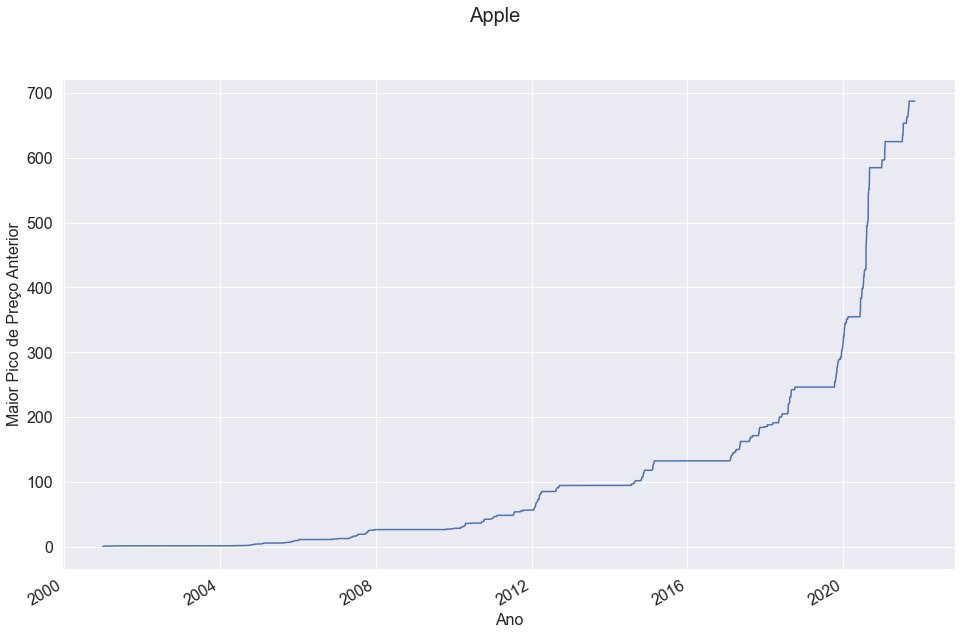

In [36]:
previous_peaks_AAPL = df_aapl.Acum.cummax()
axs=previous_peaks_AAPL.plot(figsize=(16,10))
plt.suptitle('Apple', fontsize=20);
axs.set_xlabel('Ano',fontsize=16)
axs.set_ylabel('Maior Pico de Preço Anterior',fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

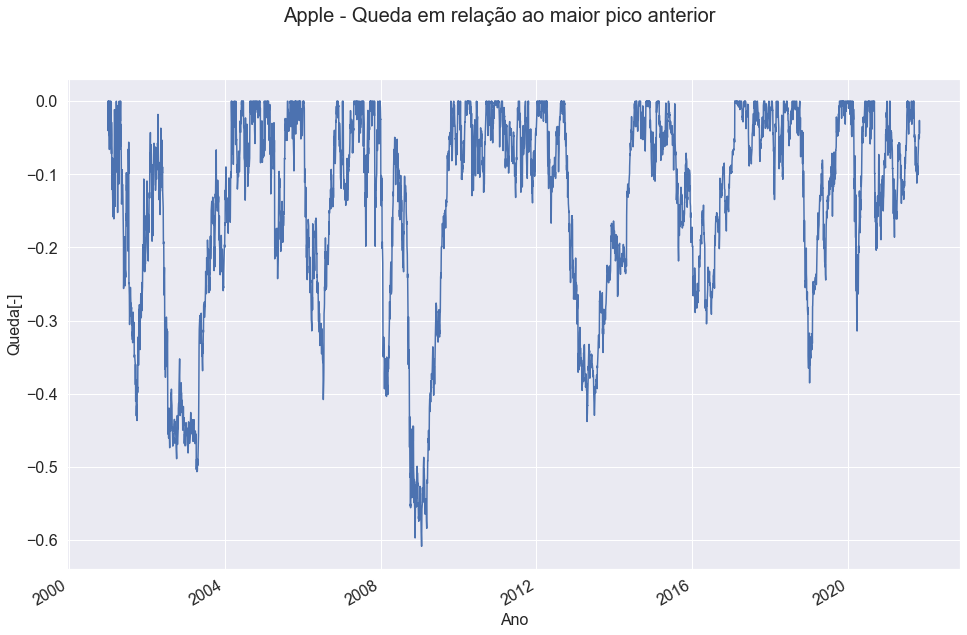

In [37]:
Drawn_Down_AAPL=(df_aapl.Acum-previous_peaks_AAPL)/previous_peaks_AAPL
axs=Drawn_Down_AAPL.plot.line(figsize=(16,10))

plt.suptitle('Apple - Queda em relação ao maior pico anterior', fontsize=20);
axs.set_xlabel('Ano',fontsize=16)
axs.set_ylabel('Queda[-]',fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

In [38]:
(Drawn_Down_AAPL.min(),Drawn_Down_AAPL.idxmin())

(-0.6086672384092571, Timestamp('2009-01-20 00:00:00'))

In [39]:
previous_peaks_MSFT = df_msft.Acum.cummax()

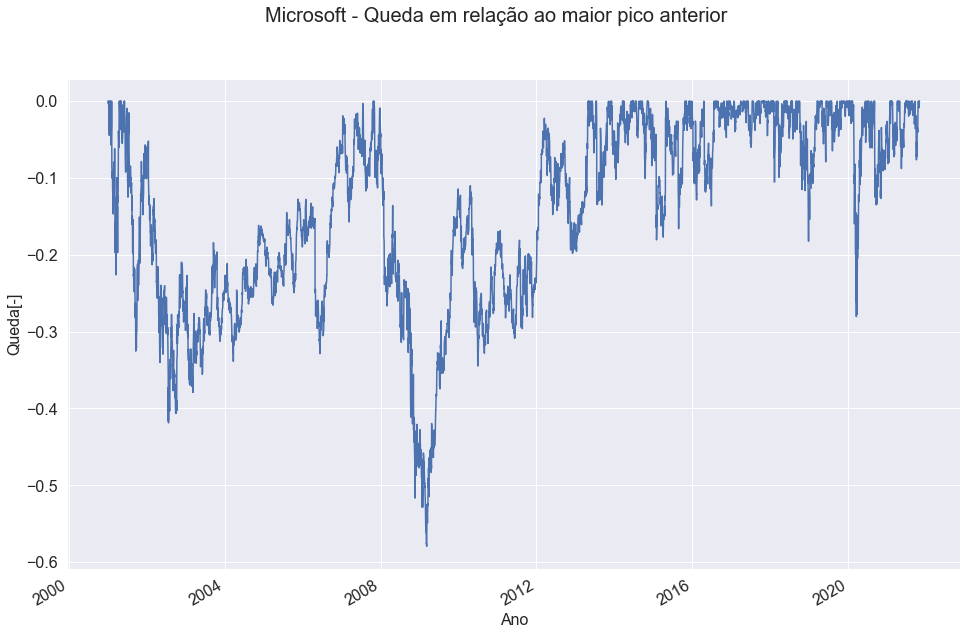

In [40]:
Drawn_Down_MSFT=(df_msft.Acum-previous_peaks_MSFT)/previous_peaks_MSFT
axs=Drawn_Down_MSFT.plot.line(figsize=(16,10))

plt.suptitle('Microsoft - Queda em relação ao maior pico anterior ', fontsize=20);
axs.set_xlabel('Ano',fontsize=16)
axs.set_ylabel('Queda[-]',fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

In [41]:
(Drawn_Down_MSFT.min(),Drawn_Down_MSFT.idxmin())

(-0.5794194855900996, Timestamp('2009-03-09 00:00:00'))

# Desvios da distribuição de retornos da distribuição Normal

Assumindo que a distribuição de retornos é normal associamos baixa probabilidade de ocorrer retornos muito altos ou muito negativos.

In [42]:
AAPL_Simulated_Gausian=np.random.normal(loc=df_aapl.Close.mean(), scale=df_aapl.Close.std(), size=(df_msft.shape[0]-1))
AAPL_Simulated_Gausian

array([ 0.02131133,  0.00983021,  0.00994368, ..., -0.00243486,
       -0.02100045, -0.0097649 ])

In [43]:
MSFT_Simulated_Gausian=np.random.normal(loc=df_msft.Close.mean(), scale=df_msft.Close.std(), size=(df_aapl.shape[0]-1))
MSFT_Simulated_Gausian

array([ 0.00834129, -0.01464595,  0.004962  , ..., -0.0088594 ,
        0.02195431, -0.01177269])

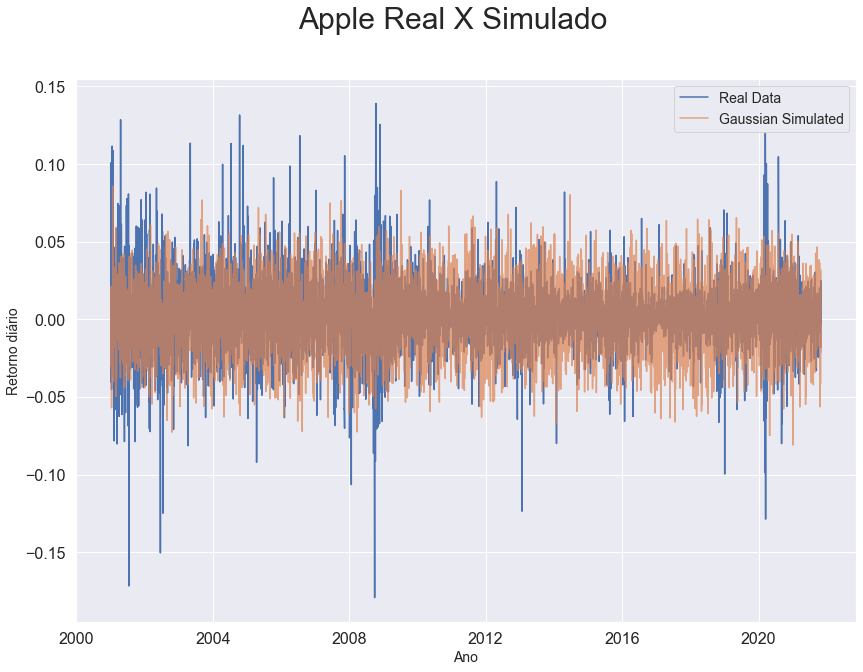

In [44]:
# Plotando alguns gráficos
fig, axs = plt.subplots(1, 1, figsize=(14,10))
fig.suptitle('Apple Real X Simulado', fontsize=30)

 

axs.plot(df_aapl.index,df_aapl.Close,label='Real Data' )
axs.plot(df_aapl.index[1:],AAPL_Simulated_Gausian,label='Gaussian Simulated',alpha=0.7)

axs.set_xlabel('Ano',fontsize=14)
axs.set_ylabel('Retorno diário',fontsize=14)
axs.legend(fontsize=14)
axs.tick_params(axis='both', which='major', labelsize=16)

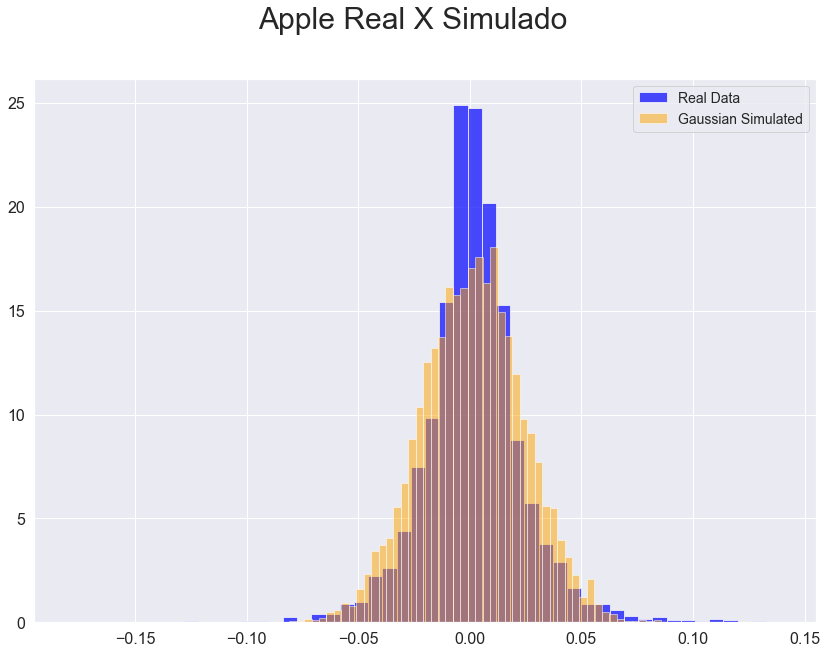

In [45]:
# Plotando alguns gráficos
fig, axs = plt.subplots(1, 1, figsize=(14,10))
fig.suptitle('Apple Real X Simulado', fontsize=30)
 
axs.hist(df_aapl.Close,label='Real Data',bins=50,density=True, facecolor='blue', alpha=0.7)
axs.hist(AAPL_Simulated_Gausian,label='Gaussian Simulated',bins=50,density=True, facecolor='orange', alpha=0.5)

axs.legend(fontsize=14)
axs.tick_params(axis='both', which='major', labelsize=16)

In [46]:
np.quantile(AAPL_Simulated_Gausian, [0.005,0.995])

array([-0.05896783,  0.05864573])

In [47]:
dfx=df_aapl['Close']
dfx.quantile([0.005,0.995])

0.005   -0.070161
0.995    0.084268
Name: Close, dtype: float64

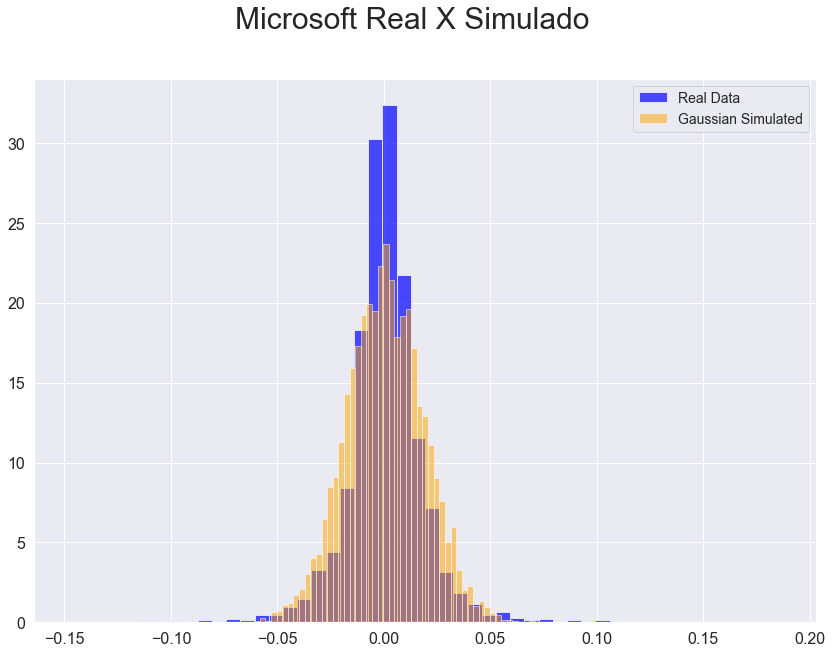

In [48]:
# Plotando alguns gráficos
fig, axs = plt.subplots(1, 1, figsize=(14,10))
fig.suptitle('Microsoft Real X Simulado', fontsize=30)

 

axs.hist(df_msft.Close,label='Real Data',bins=50,density=True, facecolor='blue', alpha=0.7)
axs.hist(MSFT_Simulated_Gausian,label='Gaussian Simulated',bins=50,density=True, facecolor='orange', alpha=0.5)



axs.legend(fontsize=14)
axs.tick_params(axis='both', which='major', labelsize=16)

# Curtose

Intuitively, the kurtosis measures the "fatness" of the tails of the distribution. The normal distribution has a kurtosis of 3 and so if the kurtosis of your returns is less than 3 then it tends to have thinner tails, and if the kurtosis is greater than 3 then the distribution has fatter tails.

Kurtosis is given by:

$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$



In [49]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [50]:
kurtosis(AAPL_Simulated_Gausian)

2.998861924978541

In [51]:
kurtosis(df_aapl['Close'])

8.221239796699596

In [52]:
kurtosis(df_msft['Close'])

11.638762064813312

A distribuição real tem caudas mais largas do que o que seria previsto por uma distribuição normal, **sendo mais comuns retornos extremos**. Curtose (cauda larga)

# Skewness - Distorção

$$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$

In [53]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [54]:
skewness(AAPL_Simulated_Gausian)

-0.014140315746756293

In [55]:
pd.DataFrame([{'mean':df_aapl['Close'].mean(),'median':df_aapl['Close'].median()}])

,mean,median
0,0.001501,0.000951


In [56]:
skewness(df_aapl['Close'])

0.07674300900638673

In [57]:
pd.DataFrame([{'mean':df_msft['Close'].mean(),'median':df_msft['Close'].median()}])

,mean,median
0,0.000772,0.000387


In [58]:
skewness(df_msft['Close'])

0.31364901817947544

Como a **média é maior que a médiana é esperado ocorram mais eventos de retorno menor que a média que previsto por uma distribuição Normal**

# Teste estatistico de normalidade da distribuição

In [59]:
scipy.stats.jarque_bera(MSFT_Simulated_Gausian)

(0.00786687271031324, 0.99607428947262)

In [60]:
scipy.stats.jarque_bera(df_aapl['Close'].dropna())

(5957.20381563292, 0.0)

In [61]:
scipy.stats.jarque_bera(df_msft['Close'].dropna())

(16379.740636487893, 0.0)

In [62]:
np.random.seed(3)
teste=np.random.normal(loc=df_aapl.Close.mean(), scale=df_aapl.Close.std(), size=(10,df_aapl.shape[0]-1))
AAPL_Simulada_100X=[]
for i in range(teste.shape[0]):
    AAPL_Simulada_100X.append((teste[i]+1).cumprod())
AAPL_Simulada_100X;

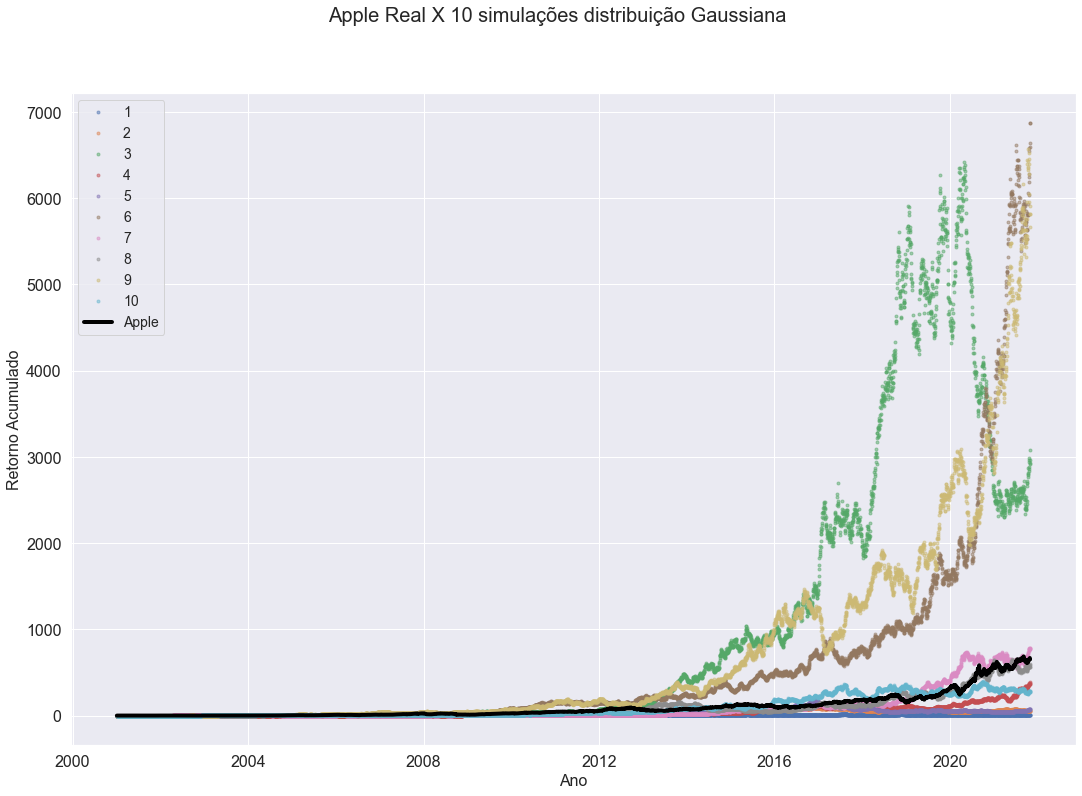

In [63]:
fig, axs = plt.subplots(1, 1, figsize=(18,12))
fig.suptitle('Apple Real X 10 simulações distribuição Gaussiana', fontsize=20);

i=1 
for AAPL_SIM in AAPL_Simulada_100X:
    axs.plot(df_aapl.index[1:],AAPL_SIM-1,label=i,marker='.', alpha=0.5, linestyle='None')
    i+=1
axs.plot(df_aapl.index,df_aapl.Acum-1,label='Apple', linewidth=4,color=[0,0,0])

#axs.plot(df_aapl.index,df_aapl.Acum-1,label='Apple')
axs.set_xlabel('Ano',fontsize=16)
axs.set_ylabel('Retorno Acumulado',fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)
axs.legend(fontsize=14);

# Comparação entre as direntes bolsas de Valores

In [64]:
df_Nasdaq=cria_tabela_1_acao('^IXIC',startdate,enddate)
df_NYSE=cria_tabela_1_acao('^NYA',startdate,enddate)
df_SP500=cria_tabela_1_acao('^GSPC',startdate,enddate)

In [65]:
df_Nasdaq

,Close,Adj_Close_plus1,Acum
Date,,,
2001-01-02,NaN,NaN,NaN
2001-01-03,0.141732,1.141732,1.141732
2001-01-04,-0.019055,0.980945,1.119977
2001-01-05,-0.062014,0.937986,1.050522
2001-01-08,-0.004872,0.995128,1.045404
...,...,...,...
2021-10-25,0.009046,1.009046,6.643822
2021-10-26,0.000591,1.000591,6.647749
2021-10-27,0.000009,1.000009,6.647805


In [66]:
df_NYSE

,Close,Adj_Close_plus1,Acum
Date,,,
2001-01-02,NaN,NaN,NaN
2001-01-03,0.026989,1.026989,1.026989
2001-01-04,-0.010622,0.989378,1.016081
2001-01-05,-0.017513,0.982487,0.998286
2001-01-08,-0.002216,0.997784,0.996074
...,...,...,...
2021-10-25,0.002735,1.002735,2.530188
2021-10-26,-0.001393,0.998607,2.526663
2021-10-27,-0.013110,0.986890,2.493539


In [67]:
df_SP500

,Close,Adj_Close_plus1,Acum
Date,,,
2001-01-02,NaN,NaN,NaN
2001-01-03,0.050099,1.050099,1.050099
2001-01-04,-0.010552,0.989448,1.039017
2001-01-05,-0.026242,0.973758,1.011751
2001-01-08,-0.001918,0.998082,1.009811
...,...,...,...
2021-10-25,0.004748,1.004748,3.558472
2021-10-26,0.001820,1.001820,3.564947
2021-10-27,-0.005052,0.994948,3.546939


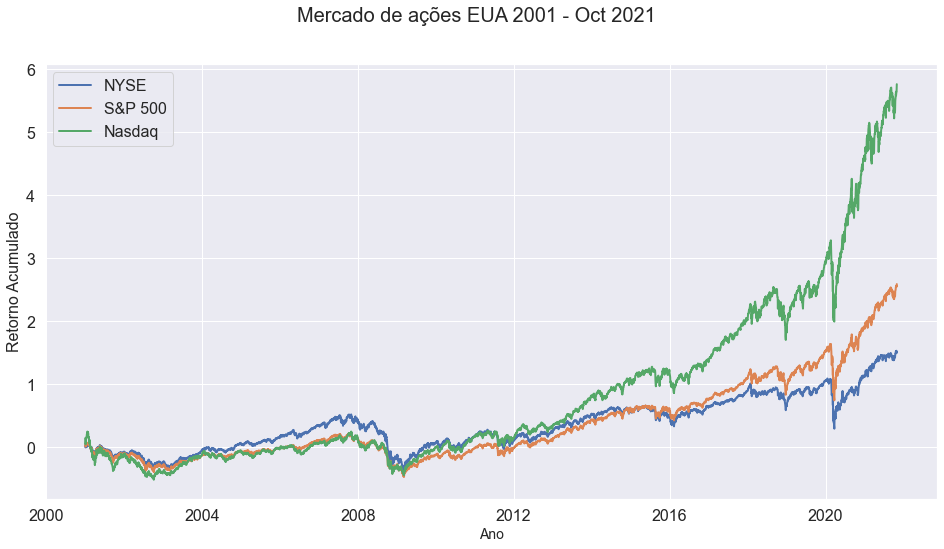

In [68]:
fig, axs = plt.subplots(1, 1, figsize=(16,8))
fig.suptitle('Mercado de ações EUA 2001 - Oct 2021', fontsize=20)
 

axs.plot(df_NYSE.index,df_NYSE['Acum']-1,label='NYSE',linewidth=2)
axs.plot(df_SP500.index,df_SP500['Acum']-1,label='S&P 500',linewidth=2)
axs.plot(df_Nasdaq.index,df_Nasdaq['Acum']-1,label='Nasdaq',linewidth=2)

axs.set_xlabel('Ano',fontsize=14)
axs.set_ylabel('Retorno Acumulado',fontsize=16)
axs.legend(fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

# Diversificação

O indice Nasdaq é uma combinação ponderada de ações que compõe o indice. O retorno esperado do indice é o retorno médio ponderado das ações que constituem o indice.

**A volatilidade do indice Nasdaq não é uma média ponderada da volatilidade das ações que a compõe, de fato ela é menor!** Isto é decorrente do fato das ações não serem completamente correlacionadas, enquanto uma sobe outra cai compensando o efeito. Quanto mais descorrelacionadas as ações menor será a volatilidade do indice.

In [69]:
Risco[['Ticker','Anual Volatility']]

,Ticker,Anual Volatility
0,AAPL,0.363813
1,MSFT,0.287870


In [70]:
df_Nasdaq['Close'].std()*np.sqrt(252)

0.23376069875138203

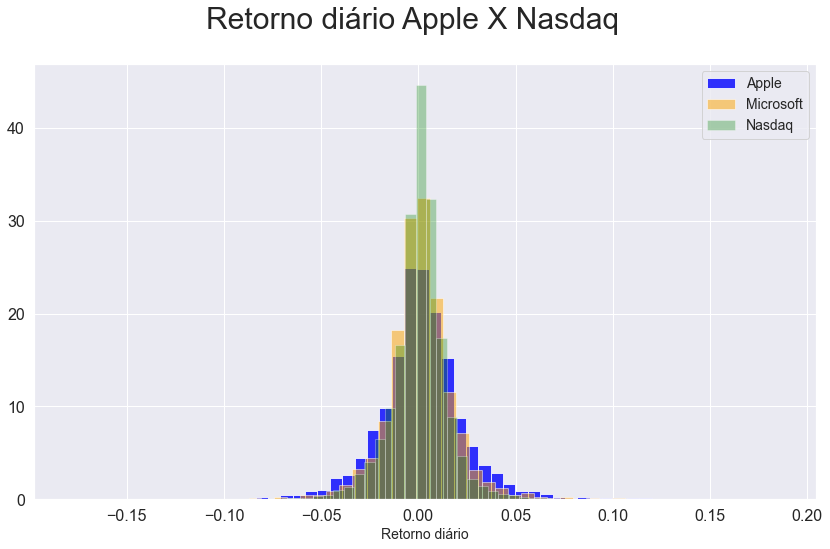

In [71]:
# Plotando alguns gráficos
fig, axs = plt.subplots(1, 1, figsize=(14,8))
fig.suptitle('Retorno diário Apple X Nasdaq', fontsize=30)
 
axs.hist(df_aapl.Close,label='Apple',bins=50,density=True, facecolor='blue', alpha=0.8)
axs.hist(df_msft.Close,label='Microsoft',bins=50,density=True, facecolor='orange', alpha=0.5)
axs.hist(df_Nasdaq.Close,label='Nasdaq',bins=50,density=True, facecolor='green', alpha=0.3)



axs.set_xlabel('Retorno diário',fontsize=14)
axs.legend(fontsize=14)
axs.tick_params(axis='both', which='major', labelsize=16)

# Analise Eleições

In [72]:
# Eleições de 2012

startdate = '2012-02-01'
enddate = '2013-01-21'


df_aapl = cria_tabela_1_acao('AAPL',startdate,enddate)
print(df_aapl)

               Close  Adj_Close_plus1      Acum
Date                                           
2012-02-01       NaN              NaN       NaN
2012-02-02 -0.002346         0.997654  0.997654
2012-02-03  0.010020         1.010020  1.007650
2012-02-06  0.009333         1.009333  1.017054
2012-02-07  0.010475         1.010475  1.027708
...              ...              ...       ...
2013-01-14 -0.035653         0.964347  1.109638
2013-01-15 -0.031550         0.968450  1.074629
2013-01-16  0.041509         1.041509  1.119236
2013-01-17 -0.006738         0.993262  1.111695
2013-01-18 -0.005331         0.994669  1.105768

[243 rows x 3 columns]


In [73]:
df_msft = cria_tabela_1_acao('MSFT',startdate,enddate)
#print(df_msft)

df_nasdaq = cria_tabela_1_acao('^IXIC',startdate,enddate)
#print(df_nasdaq)

df_nyse = cria_tabela_1_acao('^NYA',startdate,enddate)
#print(df_nyse)

df_sp500 = cria_tabela_1_acao('^GSPC',startdate,enddate)
#print(df_sp500)

In [74]:
# Eleições de 2016

startdate = '2016-02-01'
enddate = '2017-01-21'

df2_aapl = cria_tabela_1_acao('AAPL',startdate,enddate)
#print(df2_aapl)

df2_msft = cria_tabela_1_acao('MSFT',startdate,enddate)
#print(df2_msft)

df2_nasdaq = cria_tabela_1_acao('^IXIC',startdate,enddate)
#print(df2_nasdaq)

df2_nyse = cria_tabela_1_acao('^NYA',startdate,enddate)
#print(df2_nyse)

df2_sp500 = cria_tabela_1_acao('^GSPC',startdate,enddate)
#print(df2_sp500)

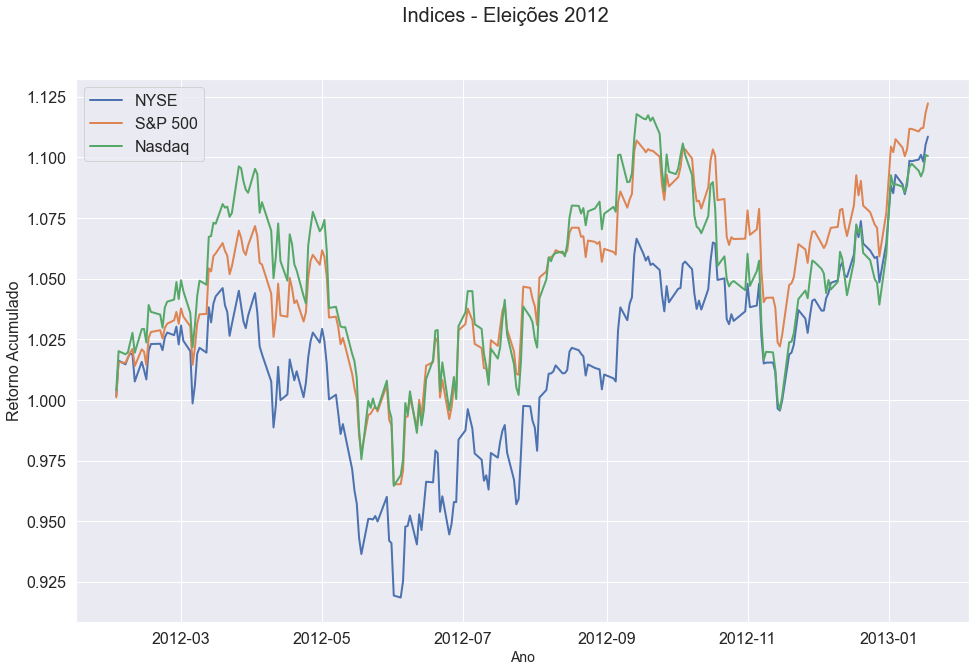

In [75]:
#Comparação entre os 3 indices

#2012
fig, axs = plt.subplots(1, 1, figsize=(16,10))
fig.suptitle('Indices - Eleições 2012 ', fontsize=20)
 

axs.plot(df_nyse.index,df_nyse['Acum'],label='NYSE',linewidth=2)
axs.plot(df_sp500.index,df_sp500['Acum'],label='S&P 500',linewidth=2)
axs.plot(df_nasdaq.index,df_nasdaq['Acum'],label='Nasdaq',linewidth=2)

axs.set_xlabel('Ano',fontsize=14)
axs.set_ylabel('Retorno Acumulado',fontsize=16)
axs.legend(fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

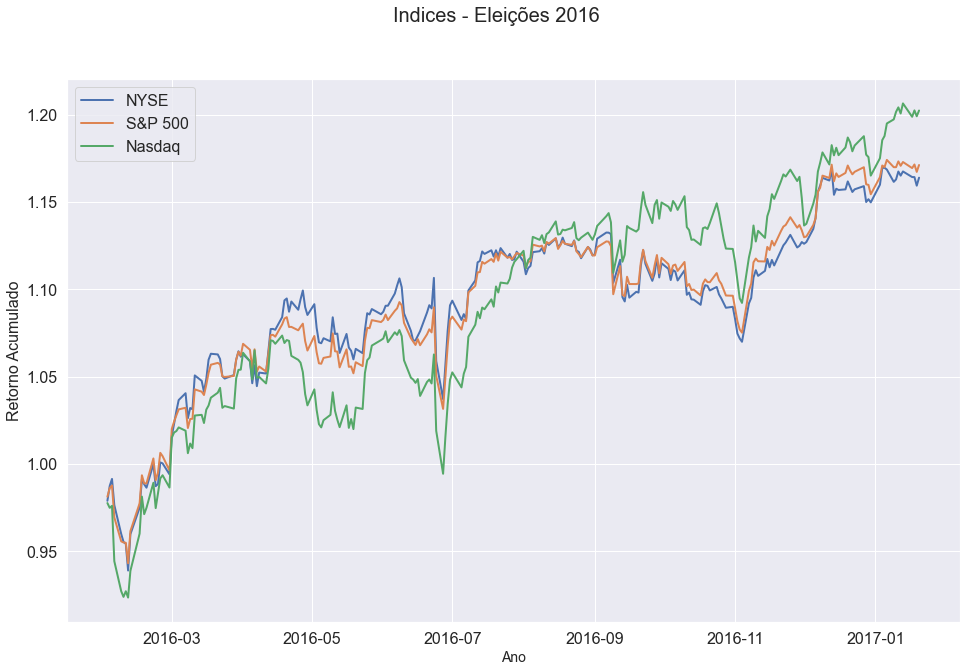

In [76]:
#2016
fig, axs = plt.subplots(1, 1, figsize=(16,10))
fig.suptitle('Indices - Eleições 2016 ', fontsize=20)
 

axs.plot(df2_nyse.index,df2_nyse['Acum'],label='NYSE',linewidth=2)
axs.plot(df2_sp500.index,df2_sp500['Acum'],label='S&P 500',linewidth=2)
axs.plot(df2_nasdaq.index,df2_nasdaq['Acum'],label='Nasdaq',linewidth=2)

axs.set_xlabel('Ano',fontsize=14)
axs.set_ylabel('Retorno Acumulado',fontsize=16)
axs.legend(fontsize=16)
axs.tick_params(axis='both', which='major', labelsize=16)

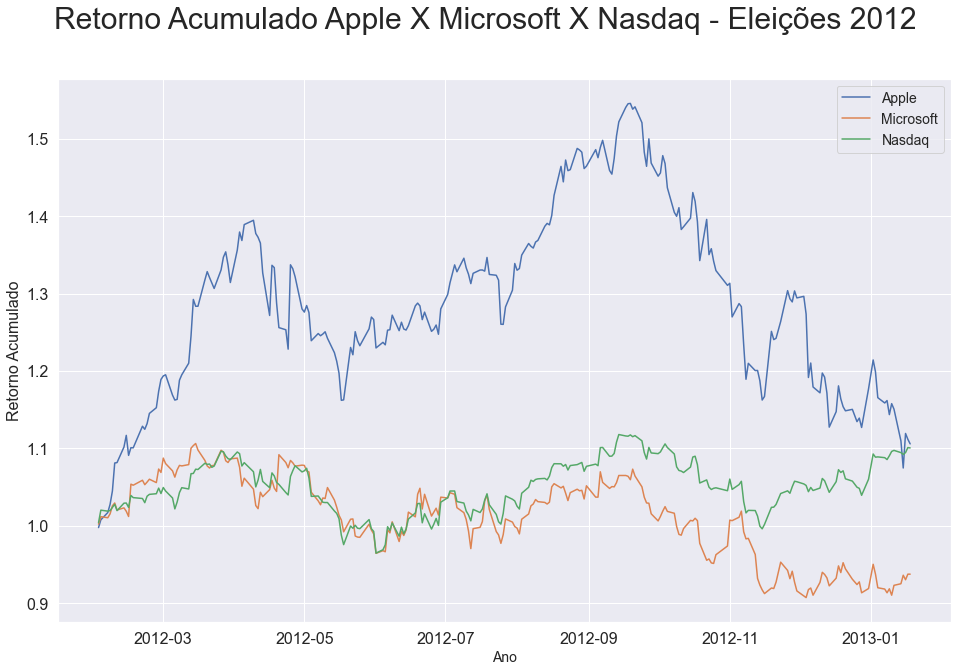

In [77]:
#grafícos do retorno acumulado nos periodos

#2012
fig, axs = plt.subplots(1, 1, figsize=(16,10))
fig.suptitle('Retorno Acumulado Apple X Microsoft X Nasdaq - Eleições 2012 ', fontsize=30)


axs.plot(df_aapl.index,df_aapl.Acum,label='Apple')
axs.plot(df_msft.index,df_msft.Acum,label='Microsoft')
axs.plot(df_msft.index,df_nasdaq.Acum,label='Nasdaq')

axs.set_xlabel('Ano',fontsize=14)
axs.set_ylabel('Retorno Acumulado',fontsize=16)
axs.legend(fontsize=14)
axs.tick_params(axis='both', which='major', labelsize=16)

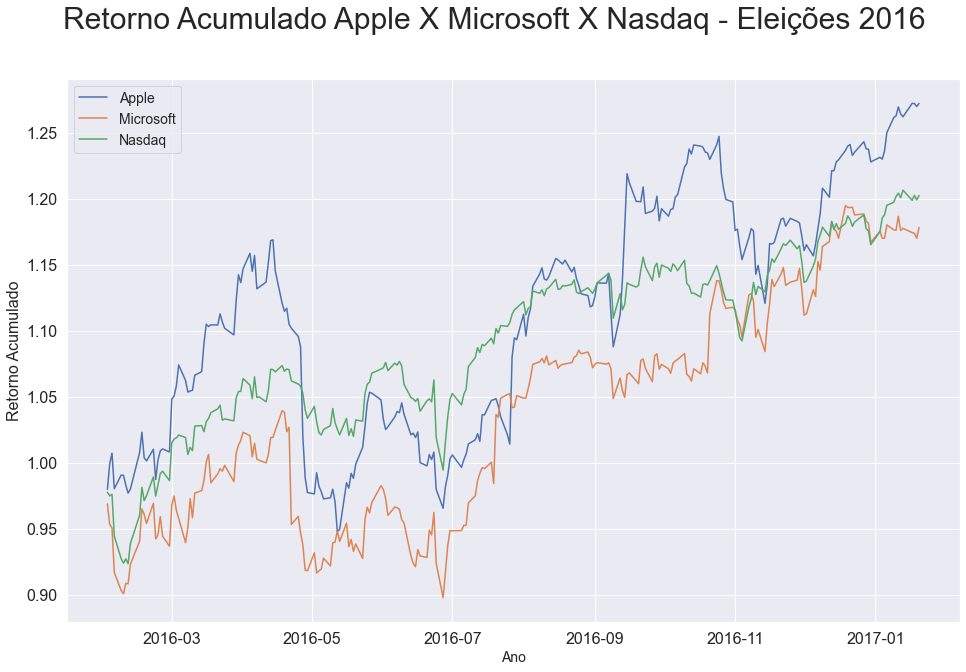

In [78]:
#2016
fig, axs = plt.subplots(1, 1, figsize=(16,10))
fig.suptitle('Retorno Acumulado Apple X Microsoft X Nasdaq - Eleições 2016 ', fontsize=30)


axs.plot(df2_aapl.index,df2_aapl.Acum,label='Apple')
axs.plot(df2_msft.index,df2_msft.Acum,label='Microsoft')
axs.plot(df2_msft.index,df2_nasdaq.Acum,label='Nasdaq')

axs.set_xlabel('Ano',fontsize=14)
axs.set_ylabel('Retorno Acumulado',fontsize=16)
axs.legend(fontsize=14)
axs.tick_params(axis='both', which='major', labelsize=16)

In [79]:
#medindo o risco de cada periodo
#2012
Risco2012=pd.DataFrame([["AAPL", df_aapl.Close.std()],["MSFT", df_msft.Close.std()],["NASDAQ", df_nasdaq.Close.std()]])
Risco2012.columns=['Ticker','Volatility']
print(Risco2012)

#2016
Risco2016=pd.DataFrame([["AAPL", df2_aapl.Close.std()],["MSFT", df2_msft.Close.std()],["NASDAQ", df2_nasdaq.Close.std()]])
Risco2016.columns=['Ticker','Volatility']
print(Risco2016)

   Ticker  Volatility
0    AAPL    0.018980
1    MSFT    0.012702
2  NASDAQ    0.009603
   Ticker  Volatility
0    AAPL    0.012879
1    MSFT    0.013023
2  NASDAQ    0.008868


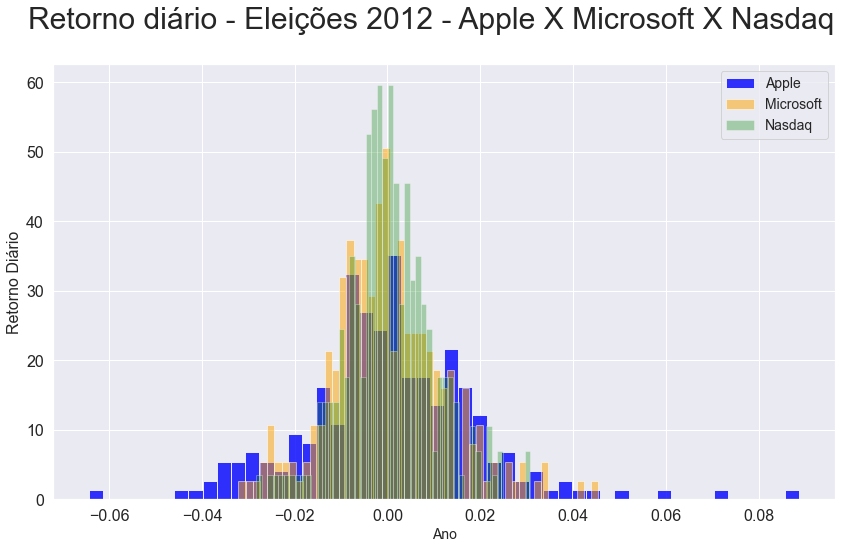

In [80]:
#Distribuição retorno diário
#2012
fig, axs = plt.subplots(1, 1, figsize=(14,8))
fig.suptitle('Retorno diário - Eleições 2012 - Apple X Microsoft X Nasdaq', fontsize=30)
 
axs.hist(df_aapl.Close,label='Apple',bins=50,density=True, facecolor='blue', alpha=0.8)
axs.hist(df_msft.Close,label='Microsoft',bins=50,density=True, facecolor='orange', alpha=0.5)
axs.hist(df_nasdaq.Close,label='Nasdaq',bins=50,density=True, facecolor='green', alpha=0.3)

axs.set_xlabel('Ano',fontsize=14)
axs.set_ylabel('Retorno Diário',fontsize=16)
axs.legend(fontsize=14)
axs.tick_params(axis='both', which='major', labelsize=16)

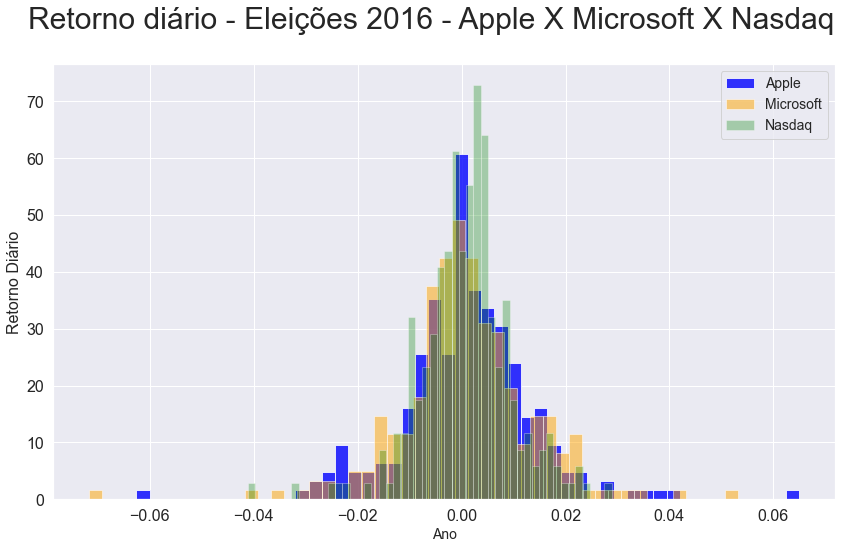

In [81]:
#2016
fig, axs = plt.subplots(1, 1, figsize=(14,8))
fig.suptitle('Retorno diário - Eleições 2016 - Apple X Microsoft X Nasdaq', fontsize=30)
 
axs.hist(df2_aapl.Close,label='Apple',bins=50,density=True, facecolor='blue', alpha=0.8)
axs.hist(df2_msft.Close,label='Microsoft',bins=50,density=True, facecolor='orange', alpha=0.5)
axs.hist(df2_nasdaq.Close,label='Nasdaq',bins=50,density=True, facecolor='green', alpha=0.3)

axs.set_xlabel('Ano',fontsize=14)
axs.set_ylabel('Retorno Diário',fontsize=16)
axs.legend(fontsize=14)
axs.tick_params(axis='both', which='major', labelsize=16)

# Comparação entre estrategias de investimento

<img src="TOP3_Retornos.png" width="800"/>

<img src="TOP50.png" width="800"/>